In [1]:
from yo_fluq_ds import *
from tg.common.delivery.sagemaker import download_and_open_sagemaker_result, S3TrainingLogsLoader, TrainingLogsViewer
from datetime import datetime
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, precision_score, recall_score
from tg.common.ml import batched_training as bt
from tg.common.ml.miscellaneous import roc_optimal_threshold

tlw = TrainingLogsViewer

In [2]:
loader = S3TrainingLogsLoader('ps-data-science-path','alt')

In [20]:
df = pd.read_parquet('files/params_0.parquet')
df

,metric,ordinal,value,timestamp,job_id
0,roc_auc_score_test,0,0.984579,2023-01-27 11:52:16.384765,att-hs100-lr001-2023-01-27-11-42-37-234
1,roc_auc_score_display,0,0.987968,2023-01-27 11:52:16.384765,att-hs100-lr001-2023-01-27-11-42-37-234
2,loss,0,0.045863,2023-01-27 11:52:16.384765,att-hs100-lr001-2023-01-27-11-42-37-234
3,iteration,0,0.000000,2023-01-27 11:52:16.384765,att-hs100-lr001-2023-01-27-11-42-37-234
4,roc_auc_score_test,1,0.984847,2023-01-27 11:54:44.282659,att-hs100-lr001-2023-01-27-11-42-37-234
...,...,...,...,...,...
395,iteration,98,98.000000,2023-01-27 15:14:32.993998,att-hs10-lr005-2023-01-27-11-39-50-862
396,roc_auc_score_test,99,0.976433,2023-01-27 15:16:36.815010,att-hs10-lr005-2023-01-27-11-39-50-862
397,roc_auc_score_display,99,0.978493,2023-01-27 15:16:36.815010,att-hs10-lr005-2023-01-27-11-39-50-862
398,loss,99,0.048486,2023-01-27 15:16:36.815010,att-hs10-lr005-2023-01-27-11-39-50-862


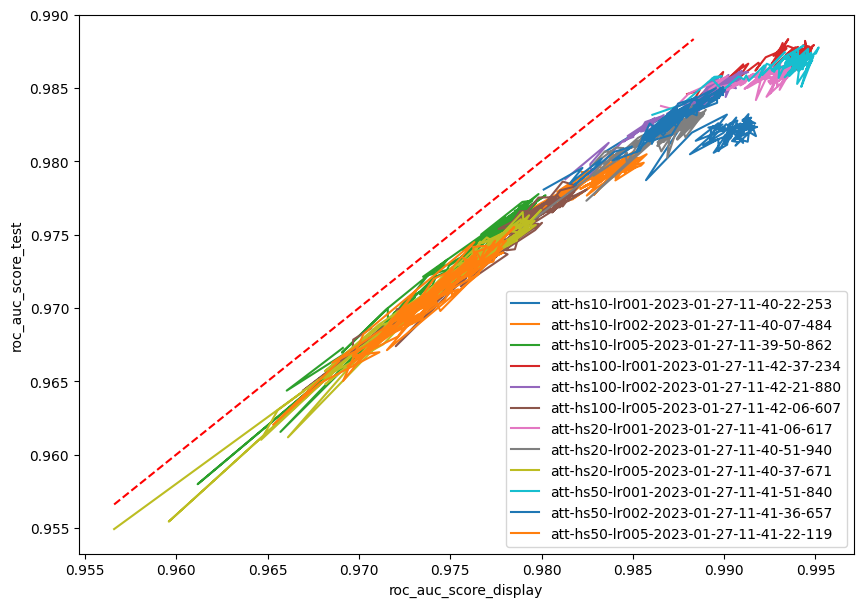

In [4]:
tlw.draw_overfit(df, 'roc_auc_score_display', 'roc_auc_score_test')

<AxesSubplot: >

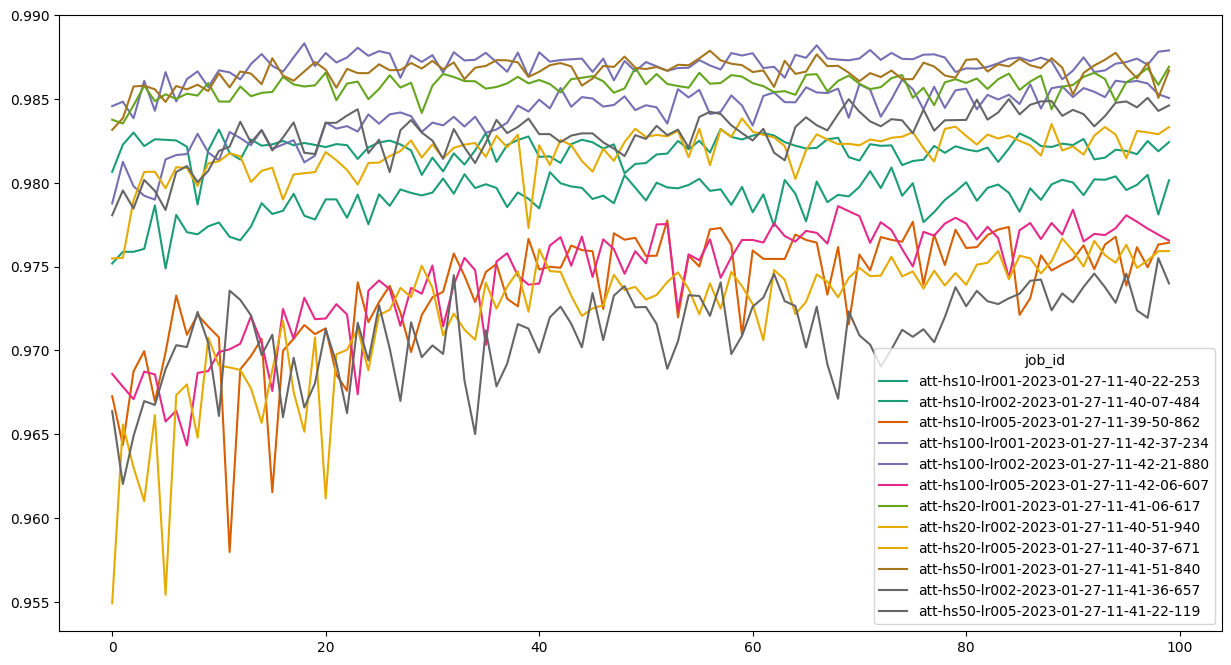

In [5]:
_, ax = plt.subplots(1,1,figsize=(15,8))
tlw.get_metric_by_job(df, 'roc_auc_score_test').plot(ax=ax, cmap='Dark2')

(0.95, 1.0)

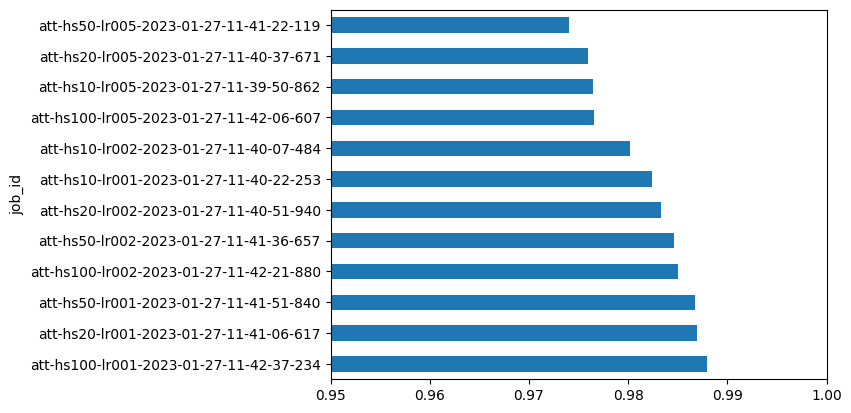

In [6]:
ax = tlw.get_last_values(df).roc_auc_score_test.sort_values(ascending=False).plot(kind='barh')
ax.set_xlim(0.95,1)

['att-rtp-bs50k-2023-02-04-17-45-07-017',
 'att-rtp-2023-02-04-17-23-29-127',
 'att-rtd3-ntsaalstm-2023-02-04-17-21-08-256',
 'att-rtd3-ntsaalstm-2023-02-04-17-20-52-138',
 'att-rtd3-ntaa-2023-02-04-17-20-36-388',
 'att-rtd3-ntlstm-2023-02-04-17-20-20-306',
 'att-rtd3f-ntsaalstm-2023-02-04-17-20-03-683',
 'att-rtd3f-ntsaalstm-2023-02-04-17-19-46-521',
 'att-rtd3f-ntaa-2023-02-04-17-19-29-093',
 'att-rtd3f-ntlstm-2023-02-04-17-19-09-755',
 'att-rtd3f-nt0-2023-02-04-17-18-23-650',
 'att-rtdim3folded-nt0-2023-02-04-17-16-00-880',
 'att-hs100-lr001-cl27-fnone-bs50k-2023-02-03-13-58-26-976',
 'att-hs100-lr001-cl27-fp-bs50k-2023-02-03-13-58-07-916',
 'att-hs100-lr001-cl9-fnone-bs50k-2023-02-03-13-55-28-188',
 'att-hs100-lr001-cl9-fp-bs50k-2023-02-03-13-54-59-593',
 'att-hs100-lr001-cl5-fnone-bs50k-2023-02-03-13-54-33-062',
 'att-hs100-lr001-cl5-fp-bs50k-2023-02-03-13-54-04-106',
 'att-hs100-lr001-cl27-fnone-2023-02-03-13-11-47-838',
 'att-hs100-lr001-cl27-fp-2023-02-03-13-11-29-805',
 'att-h

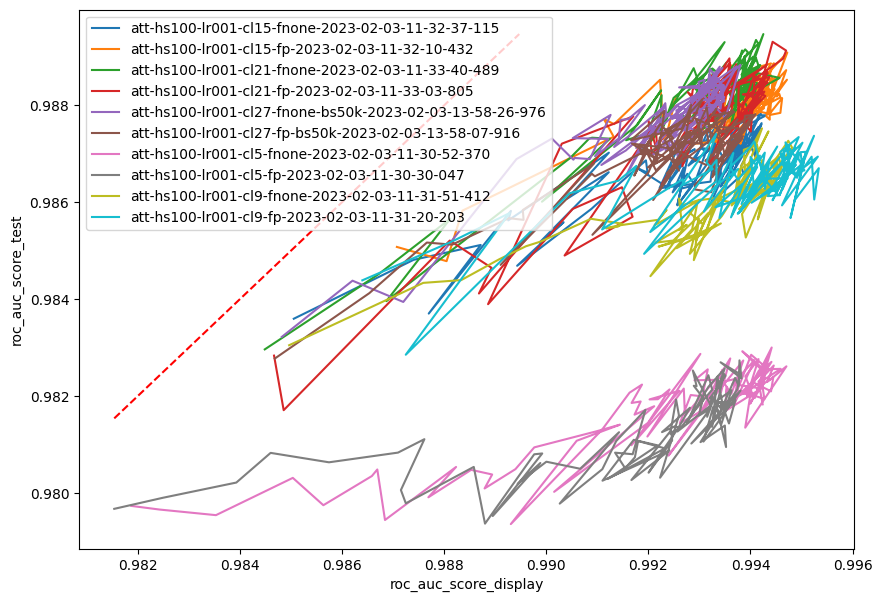

In [23]:

df = pd.read_parquet('files/params_1.parquet')
tlw.draw_overfit(df, 'roc_auc_score_display', 'roc_auc_score_test')

<AxesSubplot: >

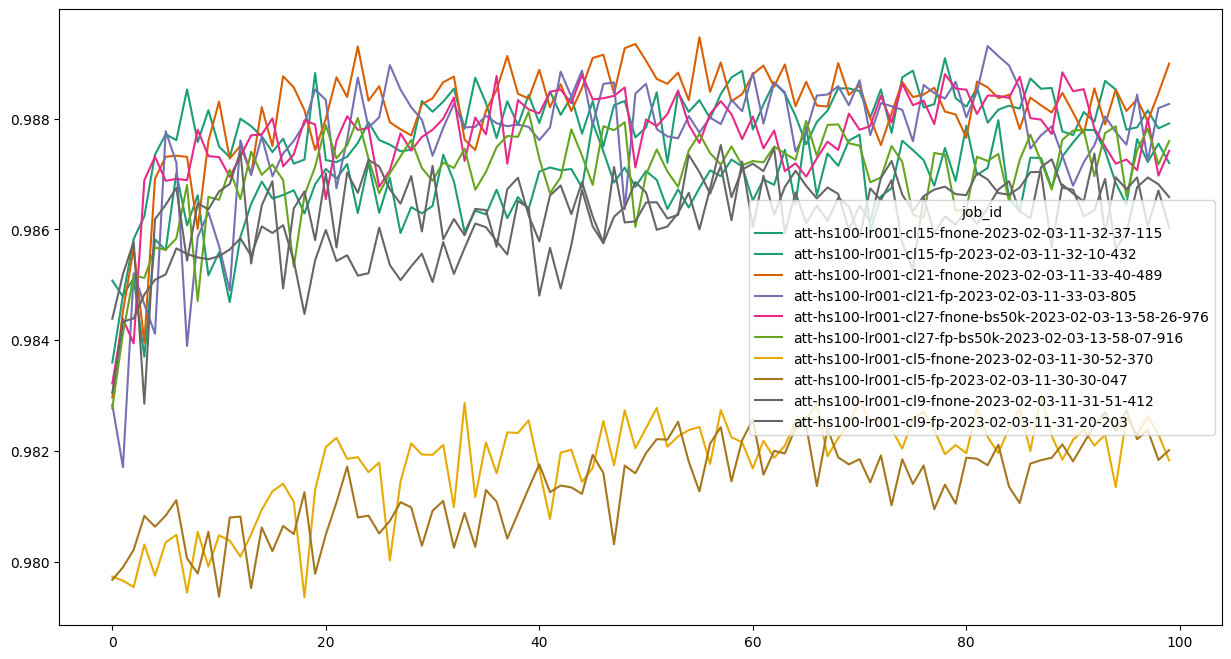

In [24]:
_, ax = plt.subplots(1,1,figsize=(15,8))
tlw.get_metric_by_job(df, 'roc_auc_score_test').plot(ax=ax, cmap='Dark2')

(0.95, 1.0)

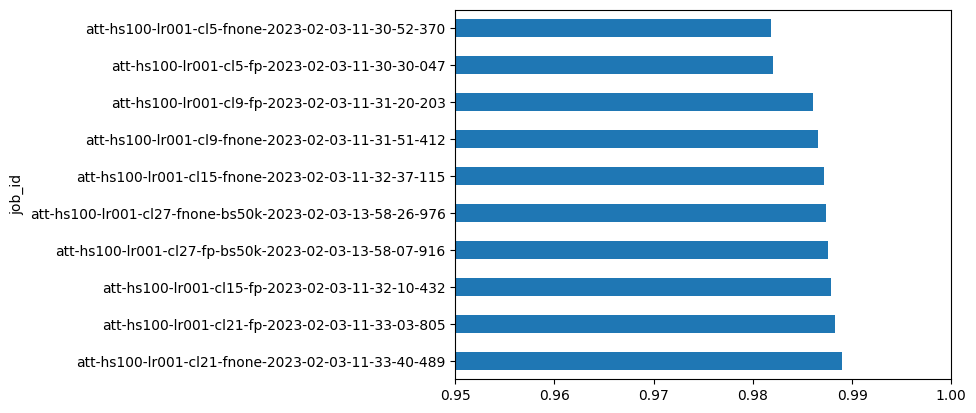

In [25]:
ax = tlw.get_last_values(df).roc_auc_score_test.sort_values(ascending=False).plot(kind='barh')
ax.set_xlim(0.95,1)

In [42]:
loader.find_jobs(datetime(2023,2,4))

['att-rtp-bs50k-2023-02-04-17-45-07-017',
 'att-rtp-2023-02-04-17-23-29-127',
 'att-rtd3-ntsaalstm-2023-02-04-17-21-08-256',
 'att-rtd3-ntsaalstm-2023-02-04-17-20-52-138',
 'att-rtd3-ntaa-2023-02-04-17-20-36-388',
 'att-rtd3-ntlstm-2023-02-04-17-20-20-306',
 'att-rtd3f-ntsaalstm-2023-02-04-17-20-03-683',
 'att-rtd3f-ntsaalstm-2023-02-04-17-19-46-521',
 'att-rtd3f-ntaa-2023-02-04-17-19-29-093',
 'att-rtd3f-ntlstm-2023-02-04-17-19-09-755',
 'att-rtd3f-nt0-2023-02-04-17-18-23-650',
 'att-rtdim3folded-nt0-2023-02-04-17-16-00-880']

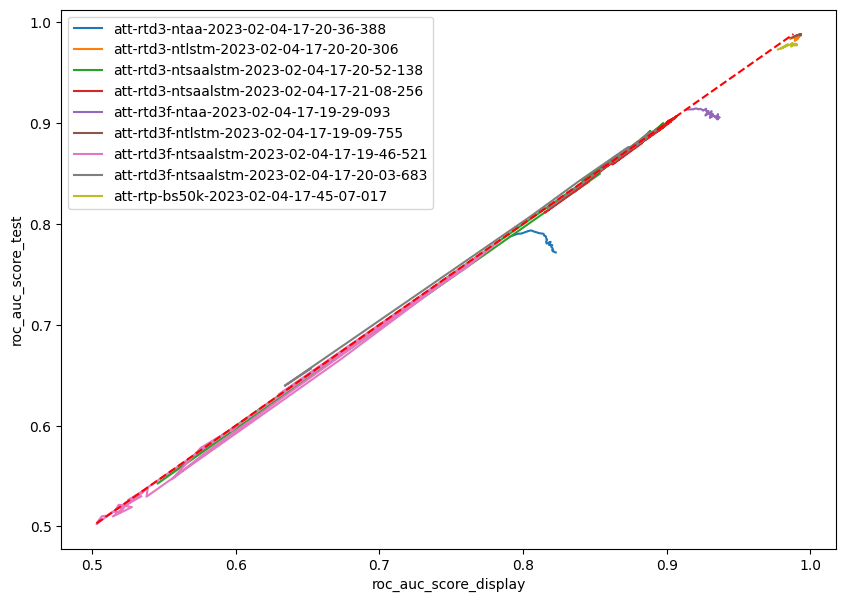

In [43]:
job_ids = ['att-rtp-bs50k-2023-02-04-17-45-07-017',
 'att-rtd3-ntsaalstm-2023-02-04-17-21-08-256',
 'att-rtd3-ntsaalstm-2023-02-04-17-20-52-138',
 'att-rtd3-ntaa-2023-02-04-17-20-36-388',
 'att-rtd3-ntlstm-2023-02-04-17-20-20-306',
 'att-rtd3f-ntsaalstm-2023-02-04-17-20-03-683',
 'att-rtd3f-ntsaalstm-2023-02-04-17-19-46-521',
 'att-rtd3f-ntaa-2023-02-04-17-19-29-093',
 'att-rtd3f-ntlstm-2023-02-04-17-19-09-755',
]
df = loader.load_and_cache_metrics(job_ids, cache_path='files/params_2.parquet', cache_mode='remake')
tlw.draw_overfit(df, 'roc_auc_score_display', 'roc_auc_score_test')

<AxesSubplot: >

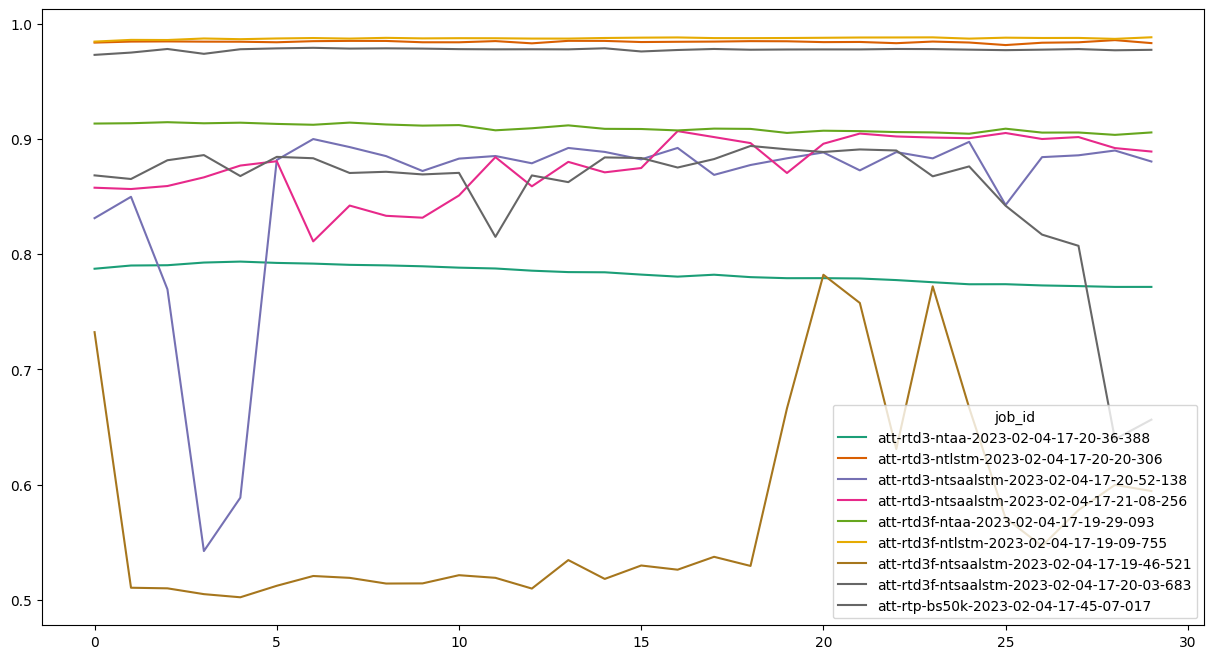

In [44]:
_, ax = plt.subplots(1,1,figsize=(15,8))
tlw.get_metric_by_job(df, 'roc_auc_score_test').plot(ax=ax, cmap='Dark2')

(0.95, 1.0)

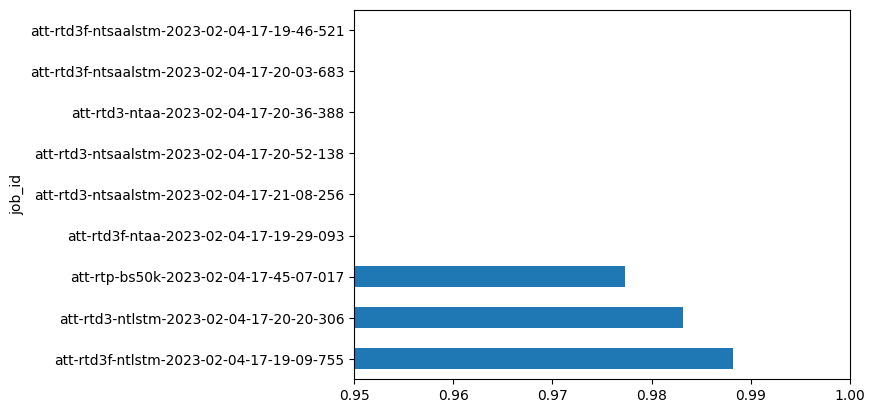

In [46]:
ax = tlw.get_last_values(df).roc_auc_score_test.sort_values(ascending=False).plot(kind='barh')
#ax.set_xlim(0.95,1)

# Deep Dive

In [36]:
job_id = 'att-hs100-lr001-cl15-fp-2023-02-03-11-32-10-432'
reader = download_and_open_sagemaker_result('ps-data-science-sandbox', 'alt', job_id, True)

In [12]:
from tg.grammar_ru import Loc

src = pd.read_parquet(Loc.data_cache_path/'bundles/alt/tsa-full/src.parquet')
src.head()

,word_id,sentence_id,word_index,paragraph_id,word_tail,word,word_type,word_length,file_id,corpus_id,is_target,label,original_corpus,original_word_id,original_sentence_id,original_paragraph_id,updated
0,0,0,0,0,1,—,punct,1,273a88ef-0d47-4a69-8c84-9b91e2d5427f,transfuzed.zip,False,0,pub.base.zip,68,4,2,False
1,1,0,1,0,1,Фильм,ru,5,273a88ef-0d47-4a69-8c84-9b91e2d5427f,transfuzed.zip,False,0,pub.base.zip,69,4,2,False
2,2,0,2,0,0,«,punct,1,273a88ef-0d47-4a69-8c84-9b91e2d5427f,transfuzed.zip,False,0,pub.base.zip,70,4,2,False
3,3,0,3,0,0,Растворяться,ru,12,273a88ef-0d47-4a69-8c84-9b91e2d5427f,transfuzed.zip,True,0,pub.base.zip,71,4,2,False
4,4,0,4,0,1,»,punct,1,273a88ef-0d47-4a69-8c84-9b91e2d5427f,transfuzed.zip,False,0,pub.base.zip,72,4,2,False


In [13]:
import numpy as np
from tg.common.ml.miscellaneous import roc_optimal_threshold

rdf = pd.read_parquet(reader.get_path('output/result_df.parquet'))
rdf = rdf.merge(src.groupby('sentence_id').size().to_frame('len'), left_on='sentence_id',right_index=True)
rdf = rdf.merge(src.set_index('word_id').original_corpus.to_frame('corp'), left_on='word_id', right_index=True)
rdf['log_len'] = np.log2(rdf.len)
rdf.log_len = rdf.log_len.astype(int)
borderline = roc_optimal_threshold(rdf.loc[rdf.split=='display'].true, rdf.loc[rdf.split=='display'].predicted)
rdf['predicted_label'] = np.where(rdf.predicted>borderline,1,0)
rdf['fail'] = rdf.predicted_label!=rdf.true


<AxesSubplot: xlabel='log_len', ylabel='sz'>

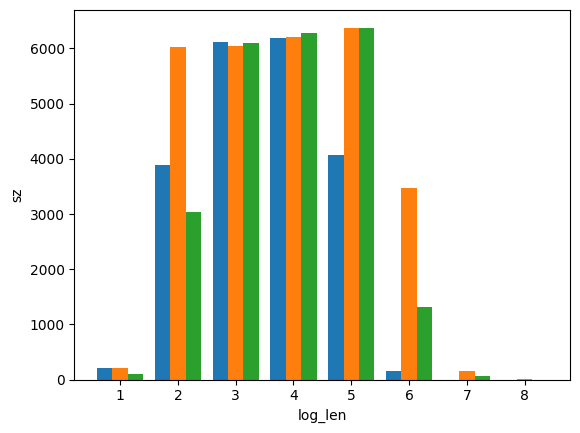

In [14]:
from tg.common.analysis import grbar_plot

grbar_plot(
    rdf.groupby(['corp','log_len']).size().to_frame('sz').reset_index(),
    value_column='sz',
    group_column='log_len',
    color_column='corp'
)

In [15]:
rows = []
for split in ['test','display']:
    for corp in rdf.corp.unique():
        for log_len in rdf.log_len.unique():
            kdf = rdf.loc[(rdf.split==split) & (rdf.corp==corp) & (rdf.log_len==log_len)]
            if kdf.shape[0]!=0 and len(kdf.true.unique())>1:
                rows.append(dict(
                    split=split, 
                    corp = corp, 
                    log_len = log_len,
                    scores = roc_auc_score(kdf.true, kdf.predicted),
                ))
sdf = pd.DataFrame(rows)

In [16]:
sdf.loc[sdf.split=='test'].pivot_table(columns='corp',index='log_len',values='scores')

corp,books.base.zip,lenta.base.zip,pub.base.zip
log_len,,,
1,0.893823,0.999322,0.931538
2,0.977558,0.996089,0.989022
3,0.983209,0.990495,0.992301
4,0.981250,0.991304,0.990942
5,0.974397,0.985251,0.989515
6,0.983452,0.987646,0.983250
7,NaN,0.991463,1.000000


In [17]:
from tg.grammar_ru import Separator 

def represent(index, src, sample=None):
    index = index.loc[index.fail]
    if sample is not None:
        index = index.sample(sample)
    df = src
    df = df.merge(
        index.reset_index().set_index('sentence_id')[['sample_id']], 
        left_on='sentence_id', 
        right_index=True
    )
    df['mark'] = np.where(df.is_target, df.label.astype(str), 'no')
    return Separator.Viewer().tooltip('sample_id').highlight('mark', {'1':'#ffaaaa', '0':'#aaffaa'}).to_html_display(df)

represent(rdf.loc[(rdf.corp=='books.base.zip') & (rdf.log_len==1)], src)

In [18]:
represent(rdf.loc[rdf.log_len>1], src, 10)